In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def pulse(t):
    return 2 * (abs(t) < 0.5)

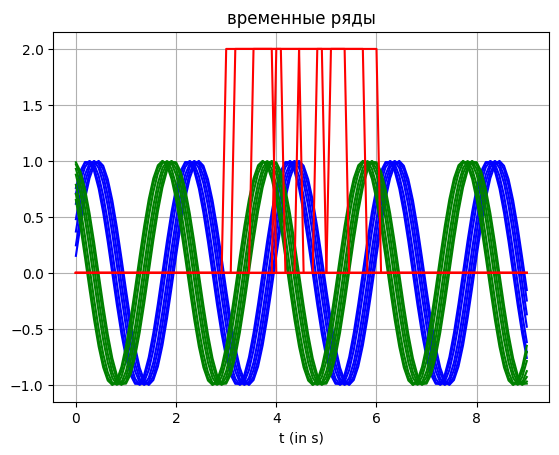

In [3]:
time_index = np.linspace(0, 9, 100)

tseries_list = {'Time': time_index}
d = np.random.random(size=10)

N = 7 

for i in range(N):
    tseries_list["Tc"+str(i)]= np.cos(np.pi*time_index + d[i])

for i in range(N):
    tseries_list["Ts"+str(i)]= np.sin(np.pi*time_index+ d[i])

for i in range(N):
    tseries_list["Tp"+str(i)]= pulse(time_index + 3*d[i] - 6)


# отрисовка всех сигналов
for i in range(N):
    plt.plot(time_index, tseries_list["Ts"+str(i)], '-b')
for i in range(N):
    plt.plot(time_index, tseries_list["Tc"+str(i)], '-g')
for i in range(N):
    plt.plot(time_index, tseries_list["Tp"+str(i)], '-r')
            
plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()

In [4]:
from scipy.spatial.distance import euclidean
from dtaidistance import dtw

x_s = np.abs(tseries_list["Ts1"])
x_c = np.abs(tseries_list["Tc6"])
x_p = np.abs(tseries_list["Tp2"])

edist1 = euclidean(x_s, x_c)
edist2 = euclidean(x_s, x_p)
edist3 = euclidean(x_p, x_c)

print (f"Euclidean\nTs1 и Tc6 = {edist1}     Ts1 и Tp2 = {edist2}   Tp2 и Tc6 = {edist3}") 

dtw1 = dtw.warping_paths(x_s, x_c)   
dtw2 = dtw.warping_paths(x_s, x_p) 
dtw3 = dtw.warping_paths(x_p, x_c)      

print (f"DTW\nTs1 и Tc6 = {dtw1[0]}     Ts1 и Tp2 = {dtw2[0]}   Tp2 и Tc6 = {dtw3[0]}")      

Euclidean
Ts1 и Tc6 = 5.778963933693814     Ts1 и Tp2 = 8.112190209103625   Tp2 и Tc6 = 8.147266061616483
DTW
Ts1 и Tc6 = 1.1913832597957343     Ts1 и Tp2 = 7.583605693828961   Tp2 и Tc6 = 7.621920425850417


(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

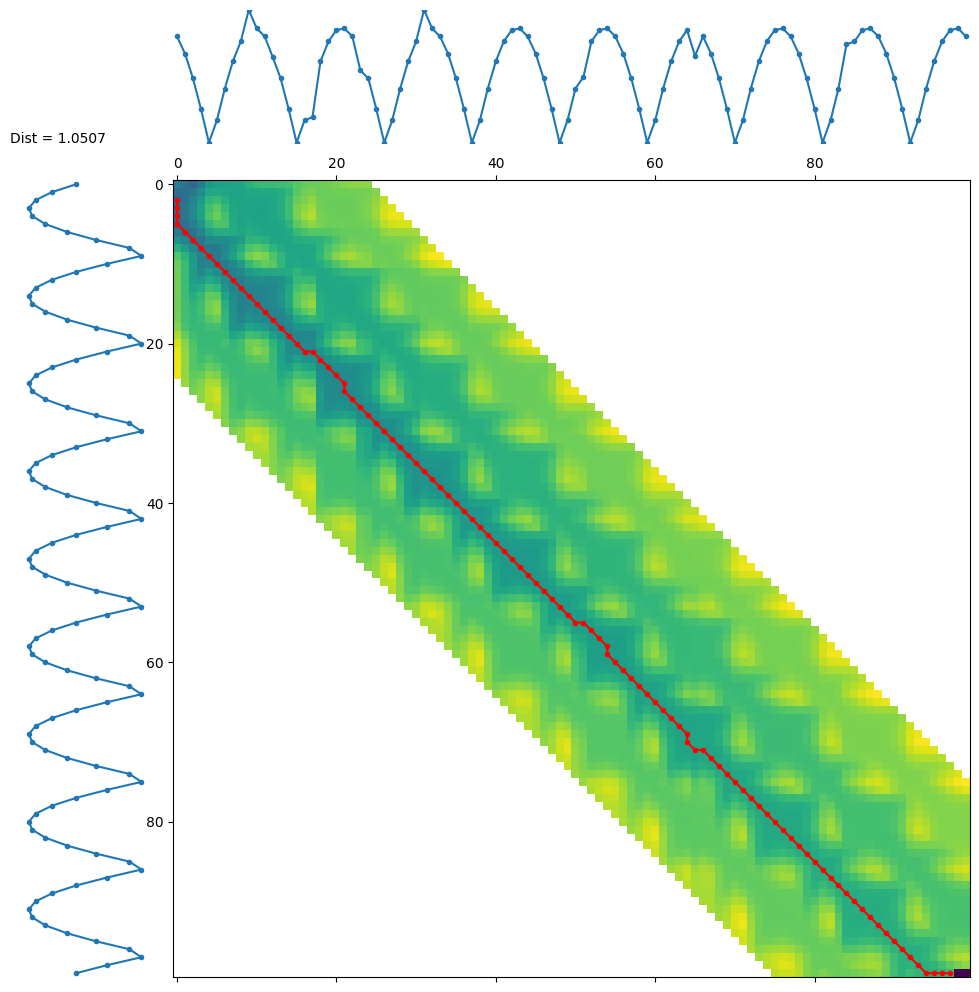

In [5]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
xw = np.arange(0, 20, .5)
s1 = x_s
s2 = x_c
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

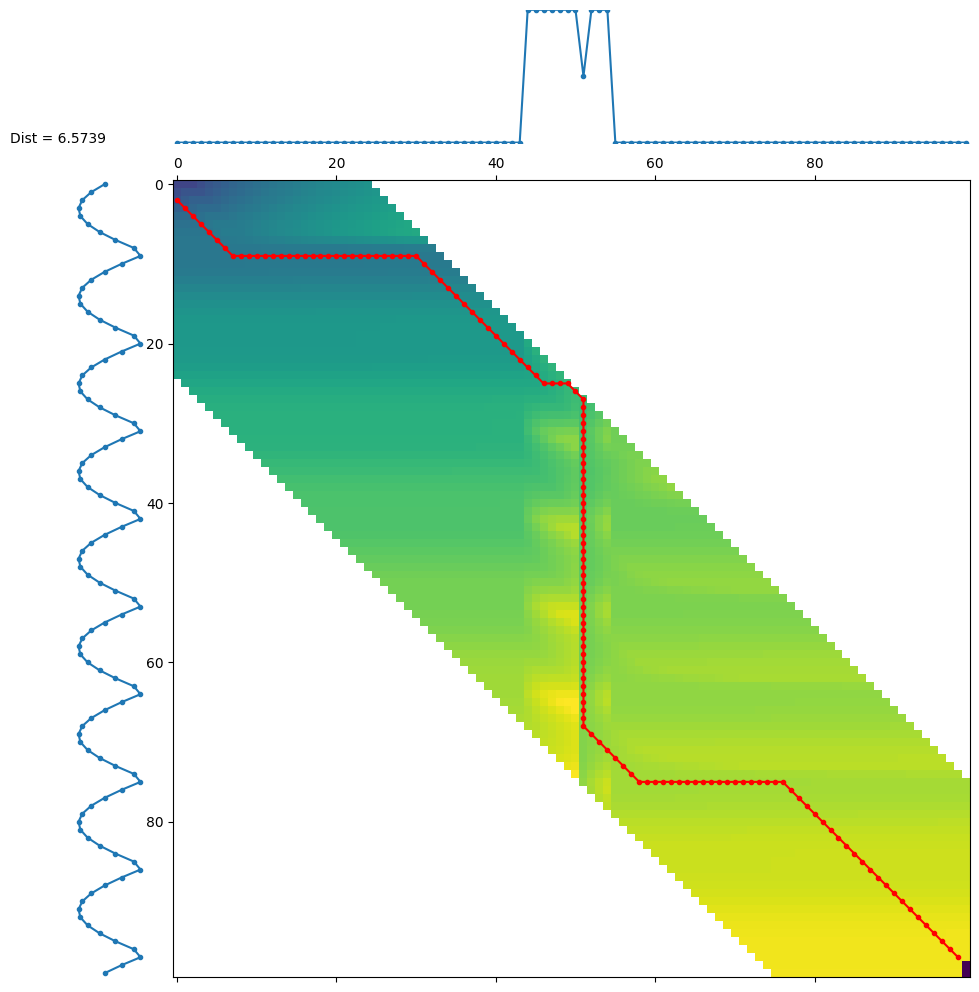

In [6]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
xw = np.arange(0, 20, .5)
s1 = x_s
s2 = x_p
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

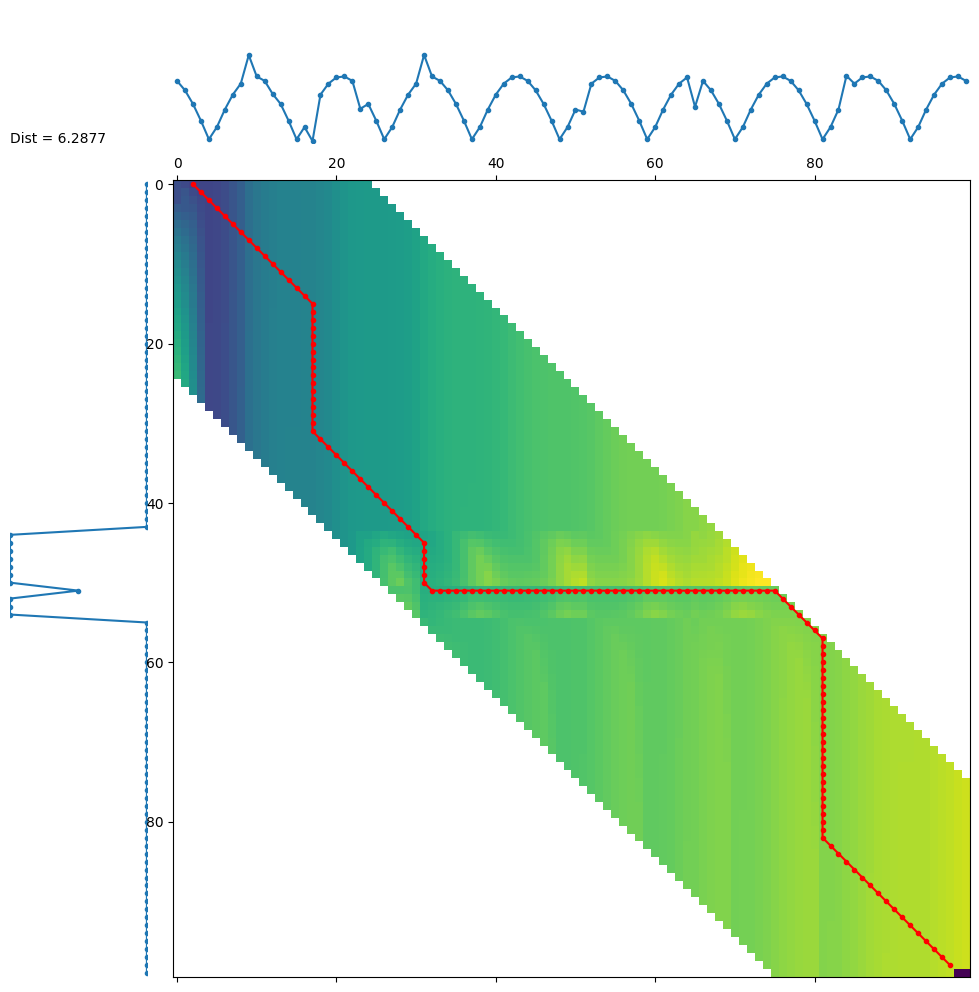

In [7]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
xw = np.arange(0, 20, .5)
s1 = x_p
s2 = x_c
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [8]:
from sklearn.model_selection import train_test_split

x = []  
Y = []  

for v in tseries_list:
    if v!= 'Time':
        x.append(tseries_list[v])
        c = v[:-1]
        if c == "Ts":
            Y.append(0)
        elif c == "Tc":
            Y.append(1)
        else: Y.append(2)


arr = np.arange(len(Y))
np.random.shuffle(arr)


print(Y)

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2)

print(X_train)
print(y_train)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([ 0.96914174,  0.86043645,  0.68202372,  0.44835748,  0.17836799,
       -0.10607182, -0.38191832, -0.62682407, -0.82094826, -0.94856411,
       -0.99933293, -0.96914174, -0.86043645, -0.68202372, -0.44835748,
       -0.17836799,  0.10607182,  0.38191832,

In [10]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_true, y_pred = [], []

print("KNN with euclidean")
print(f"Accuracy {clf.score(X_test, y_test)}")
for i in range(len(X_test)):
    pred = np.max(clf.predict_proba(X_test[i].reshape(1, -1))[0])
    print(f"{i}: Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))[0]}")
    y_pred.append(pred)
    print(f"{i}: Истинный класс для предсказаний {y_test[i]}")
    y_true.append(y_test[i])

KNN with euclidean
Accuracy 1.0
0: Вектор вероятности принадлежности к классам [1. 0. 0.]
0: Истинный класс для предсказаний 0
1: Вектор вероятности принадлежности к классам [0. 1. 0.]
1: Истинный класс для предсказаний 1
2: Вектор вероятности принадлежности к классам [1. 0. 0.]
2: Истинный класс для предсказаний 0
3: Вектор вероятности принадлежности к классам [0. 0. 1.]
3: Истинный класс для предсказаний 2
4: Вектор вероятности принадлежности к классам [0. 1. 0.]
4: Истинный класс для предсказаний 1


In [12]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric="dtw")
clf.fit(X_train, y_train)

y_true, y_pred = [], []

print("KNN with DTW")
print(f"Accuracy {clf.score(X_test, y_test)}")
for i in range(len(X_test)):
    pred = np.max(clf.predict_proba(X_test[i].reshape(1, -1))[0])
    print(f"{i}: Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))[0]}")
    y_pred.append(pred)
    print(f"{i}: Истинный класс для предсказаний {y_test[i]}")
    y_true.append(y_test[i])

KNN with DTW
Accuracy 1.0
0: Вектор вероятности принадлежности к классам [1. 0. 0.]
0: Истинный класс для предсказаний 0
1: Вектор вероятности принадлежности к классам [0. 1. 0.]
1: Истинный класс для предсказаний 1
2: Вектор вероятности принадлежности к классам [1. 0. 0.]
2: Истинный класс для предсказаний 0
3: Вектор вероятности принадлежности к классам [0. 0. 1.]
3: Истинный класс для предсказаний 2
4: Вектор вероятности принадлежности к классам [0. 1. 0.]
4: Истинный класс для предсказаний 1


In [13]:
from pyts.classification import TimeSeriesForest

clf = TimeSeriesForest(random_state=43)
clf.fit(X_train, y_train)

y_true, y_pred = [], []

print("TimeSEriesForest")
print(f"Accuracy {clf.score(X_test, y_test)}")
for i in range(len(X_test)):
    pred = np.max(clf.predict_proba(X_test[i].reshape(1, -1))[0])
    print(f"{i}: Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))[0]}")
    y_pred.append(pred)
    print(f"{i}: Истинный класс для предсказаний {y_test[i]}")
    y_true.append(y_test[i])

TimeSEriesForest
Accuracy 1.0
0: Вектор вероятности принадлежности к классам [0.98  0.016 0.004]
0: Истинный класс для предсказаний 0
1: Вектор вероятности принадлежности к классам [0.058 0.844 0.098]
1: Истинный класс для предсказаний 1
2: Вектор вероятности принадлежности к классам [0.972 0.014 0.014]
2: Истинный класс для предсказаний 0
3: Вектор вероятности принадлежности к классам [0.11 0.15 0.74]
3: Истинный класс для предсказаний 2
4: Вектор вероятности принадлежности к классам [0.1   0.766 0.134]
4: Истинный класс для предсказаний 1
